In [315]:
import pandas as pd
from plotnine import *

import plotly.graph_objs as go
import plotly.express as px #for interactive visualisations and pie charts


In [316]:
data = pd.read_csv('/kaggle/input/prisoners-dataset/Prisoners_data.csv')
data.head()

,Sl. No.,State/UT,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total,Domicile - Belongs to State,...,Offences against Property - Arson - (Col. 19),Offences against Property - Burglary - (Col. 20),Total Offences against Property - (Col. 21),Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22),Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23),Other Crime Against Women - Insult to the Modesty of Women - (Col. 24),Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25),Undertrials of offences against women (Total of Col. 5 + Col. 8 + Col. 9 + Col.23 + Col.24) - (Col. 26),Other IPC Crimes - (Col. 27),Total Undertrials (IPC Crimes) - (Col. 28)
0,1,Andhra Pradesh,1882,1847,883,277,49,63,5001,2243,...,1,97,1044,34,102,8,110,406,345,2747
1,2,Arunachal Pradesh,31,54,38,4,0,0,127,92,...,19,10,69,0,0,0,0,9,4,126
2,3,Assam,3097,2232,930,224,4,8,6495,2687,...,39,270,1820,29,159,1,160,601,197,5616
3,4,Bihar,11675,17502,11623,2606,387,394,44187,7605,...,58,290,7532,74,642,27,669,4160,503,25890
4,5,Chhattisgarh,3268,5997,1940,541,67,150,11963,5785,...,13,373,1753,44,32,14,46,3024,732,10336


In [317]:
cols_to_drop = data.columns[13:25]
data = data.drop(cols_to_drop, axis = 1)

In [318]:
data.describe()

,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total,Domicile - Belongs to State,Domicile - Belongs to other State,Domicile - Belongs to other Country,...,Offences against Property - Arson - (Col. 19),Offences against Property - Burglary - (Col. 20),Total Offences against Property - (Col. 21),Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22),Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23),Other Crime Against Women - Insult to the Modesty of Women - (Col. 24),Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25),Undertrials of offences against women (Total of Col. 5 + Col. 8 + Col. 9 + Col.23 + Col.24) - (Col. 26),Other IPC Crimes - (Col. 27),Total Undertrials (IPC Crimes) - (Col. 28)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,7715.153846,11645.076923,6543.923077,1828.538462,375.923077,495.076923,28603.692308,8049.692308,523.307692,87.692308,...,53.307692,437.923077,5963.923077,108.538462,320.307692,35.461538,355.769231,4963.076923,896.769231,21812.000000
std,21796.316049,32532.639345,18146.010568,5189.484529,1065.486308,1421.156097,80064.731536,23057.717742,1422.993660,242.932431,...,155.903842,1254.172875,16496.774111,310.364119,927.045623,95.342553,1019.991240,14081.743665,2559.522575,61091.629359
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,306.000000,99.000000,16.500000,2.000000,2.500000,489.000000,114.000000,13.500000,2.500000,...,0.000000,6.500000,76.500000,0.000000,0.000000,0.000000,0.000000,76.500000,25.500000,344.500000
50%,1882.000000,1847.000000,1243.000000,277.000000,67.000000,91.000000,5001.000000,1698.000000,145.000000,8.000000,...,4.000000,94.000000,1215.000000,10.000000,25.000000,5.000000,57.000000,601.000000,134.000000,3039.000000
75%,3972.500000,6847.500000,4133.500000,895.500000,232.000000,192.500000,16286.500000,4385.000000,328.500000,41.500000,...,23.500000,261.500000,3502.500000,71.500000,148.500000,16.000000,149.000000,3073.500000,554.000000,12455.000000
max,100297.000000,151386.000000,85071.000000,23771.000000,4887.000000,6436.000000,371848.000000,104646.000000,6803.000000,1140.000000,...,693.000000,5693.000000,77531.000000,1411.000000,4164.000000,461.000000,4625.000000,64520.000000,11658.000000,283556.000000


### There are total of 87 columns describing the data. The description includes personal information like education, domicile etc. of the prisoners and the crimes commited.

In [319]:
# %%capture
columns = data.columns
states = data['State/UT']
print(columns)


#printing all the columns to see once the categories in the data

Index(['Sl. No.', 'State/UT', 'Educational Standard - Illiterate',
       'Educational Standard - Below Class X',
       'Educational Standard - Class X & above but below Graduation',
       'Educational Standard - Graduate',
       'Educational Standard - Holding Tech. Degree/ Diploma',
       'Educational Standard - Post Graduate', 'Educational Standard - Total',
       'Domicile - Belongs to State', 'Domicile - Belongs to other State',
       'Domicile - Belongs to other Country', 'Domicile - Total', 'Hindu',
       'Muslim', 'Sikh', 'Christian', 'Others', 'Total (Religion)',
       'Convicts - Male', 'Convicts - Female', 'Convicts - Transgender',
       'Convicts - Total', 'Undertrials - Male', 'Undertrials - Female',
       'Undertrials - Transgender', 'Undertrials - Total', 'Detenues - Male',
       'Detenues - Female', 'Detenues - Transgender', 'Detenues - Total',
       'Others - Male', 'Others - Female', 'Others - Transgender',
       'Others - Total', 'Total - Male', 'Total -

#### After seeing the columns of the data, analysing each category separately makes sense. We have 
* Education
* Domicile
* Convicts
* Undertrials
* Regligion 
* Age groups
* Based on offence

as the main categories. We'll visualize the data categoriwise and see the visualization for all states

### Education

In [320]:
columns[8]

'Educational Standard - Total'

In [321]:
education_data = data.iloc[:,0:9]
education_data.head()

,Sl. No.,State/UT,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total
0,1,Andhra Pradesh,1882,1847,883,277,49,63,5001
1,2,Arunachal Pradesh,31,54,38,4,0,0,127
2,3,Assam,3097,2232,930,224,4,8,6495
3,4,Bihar,11675,17502,11623,2606,387,394,44187
4,5,Chhattisgarh,3268,5997,1940,541,67,150,11963


In [322]:
for each in education_data.columns[2:]:
    education_data[each] = (education_data[each]/education_data['Educational Standard - Total'])*100

In [323]:
education_data.columns
#maybe a line plot in this

Index(['Sl. No.', 'State/UT', 'Educational Standard - Illiterate',
       'Educational Standard - Below Class X',
       'Educational Standard - Class X & above but below Graduation',
       'Educational Standard - Graduate',
       'Educational Standard - Holding Tech. Degree/ Diploma',
       'Educational Standard - Post Graduate', 'Educational Standard - Total'],
      dtype='object')

In [324]:
labels = ['Illiterate', 'Below Class X', 'Class X', 'Graduate', 'Tech', 'PostGraduate']
values = [data['Educational Standard - Illiterate'].sum(), data['Educational Standard - Below Class X'].sum(), data['Educational Standard - Class X & above but below Graduation'].sum(), data['Educational Standard - Graduate'].sum(), data['Educational Standard - Holding Tech. Degree/ Diploma'].sum(), data['Educational Standard - Post Graduate'].sum()]
colors = ['purple', 'orange', 'pink', 'green', 'blue', 'red']

pull = [0.1, 0, 0, 0, 0, 0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), pull=pull)])
fig.update_layout(title='Education Level')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

### Here we can see from the All-India stats that (almost) 70% of the criminals are literate and majority dropouts even before completing 10th standard.

In [325]:
numeric_columns = education_data.columns[2:]
education_data[numeric_columns] = education_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

### Domicile

In [326]:
columns[9:13]

Index(['Domicile - Belongs to State', 'Domicile - Belongs to other State',
       'Domicile - Belongs to other Country', 'Domicile - Total'],
      dtype='object')

In [327]:
domicile = data.iloc[:,9:13]
domicile['State/UT'] = states
domicile['Home State Other State Ratio'] = domicile['Domicile - Belongs to State']/domicile['Domicile - Belongs to other State']

In [328]:
domicile

,Domicile - Belongs to State,Domicile - Belongs to other State,Domicile - Belongs to other Country,Domicile - Total,State/UT,Home State Other State Ratio
0,2243,114,3,2360,Andhra Pradesh,19.675439
1,92,34,0,126,Arunachal Pradesh,2.705882
2,2687,87,5,2779,Assam,30.885057
3,7605,125,11,7741,Bihar,60.840000
4,5785,311,6,6102,Chhattisgarh,18.601286
5,70,34,1,105,Goa,2.058824
6,3666,159,28,3853,Gujarat,23.056604
7,2556,777,5,3338,Haryana,3.289575
8,631,159,63,853,Himachal Pradesh,3.968553
9,4861,223,0,5084,Jharkhand,21.798206


In [329]:
#make a bar graph of ratio of home state other state 

### The Total(All India) value of Home State/ Other State is nearly around 15 but there are some states where the ratio is signigicantly higher like West Bengal, Uttar Pradesh and Bihar

## Convicts UnderTrials and Dentenues

In [330]:
columns[19:36]

Index(['Convicts - Male', 'Convicts - Female', 'Convicts - Transgender',
       'Convicts - Total', 'Undertrials - Male', 'Undertrials - Female',
       'Undertrials - Transgender', 'Undertrials - Total', 'Detenues - Male',
       'Detenues - Female', 'Detenues - Transgender', 'Detenues - Total',
       'Others - Male', 'Others - Female', 'Others - Transgender',
       'Others - Total', 'Total - Male'],
      dtype='object')

## Age Groups (Convicts)

In [331]:
columns[39:48]

Index(['16 - 18 Years - No. of Convicts', '16 - 18 Years - % Share',
       '18 - 30 Years - No. of Convicts', '18 - 30 Years - % Share',
       '30 - 50 Years - No. of Convicts', '30 - 50 Years - % Share',
       '50 Years & Above - No. of Convicts', '50 Years & Above - % Share',
       'Total - No. of Convicts (AgeGroup)'],
      dtype='object')

In [332]:
age = data.iloc[:,39:48]
age['State/UT'] = states

#### Piechart showing age distribution in ALL-India

In [333]:
labels = ['18 - 30 Years', '30 - 50 Years', '50 Years & Above']
values = [age['18 - 30 Years - No. of Convicts'][len(age)-1],age['30 - 50 Years - No. of Convicts'][len(age)-1],age['50 Years & Above - No. of Convicts'][len(age)-1]]

pull = [0.1, 0, 0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), pull=pull)])
fig.update_layout(title='Age Distribution')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

#### Top 10 states for each of the age groups

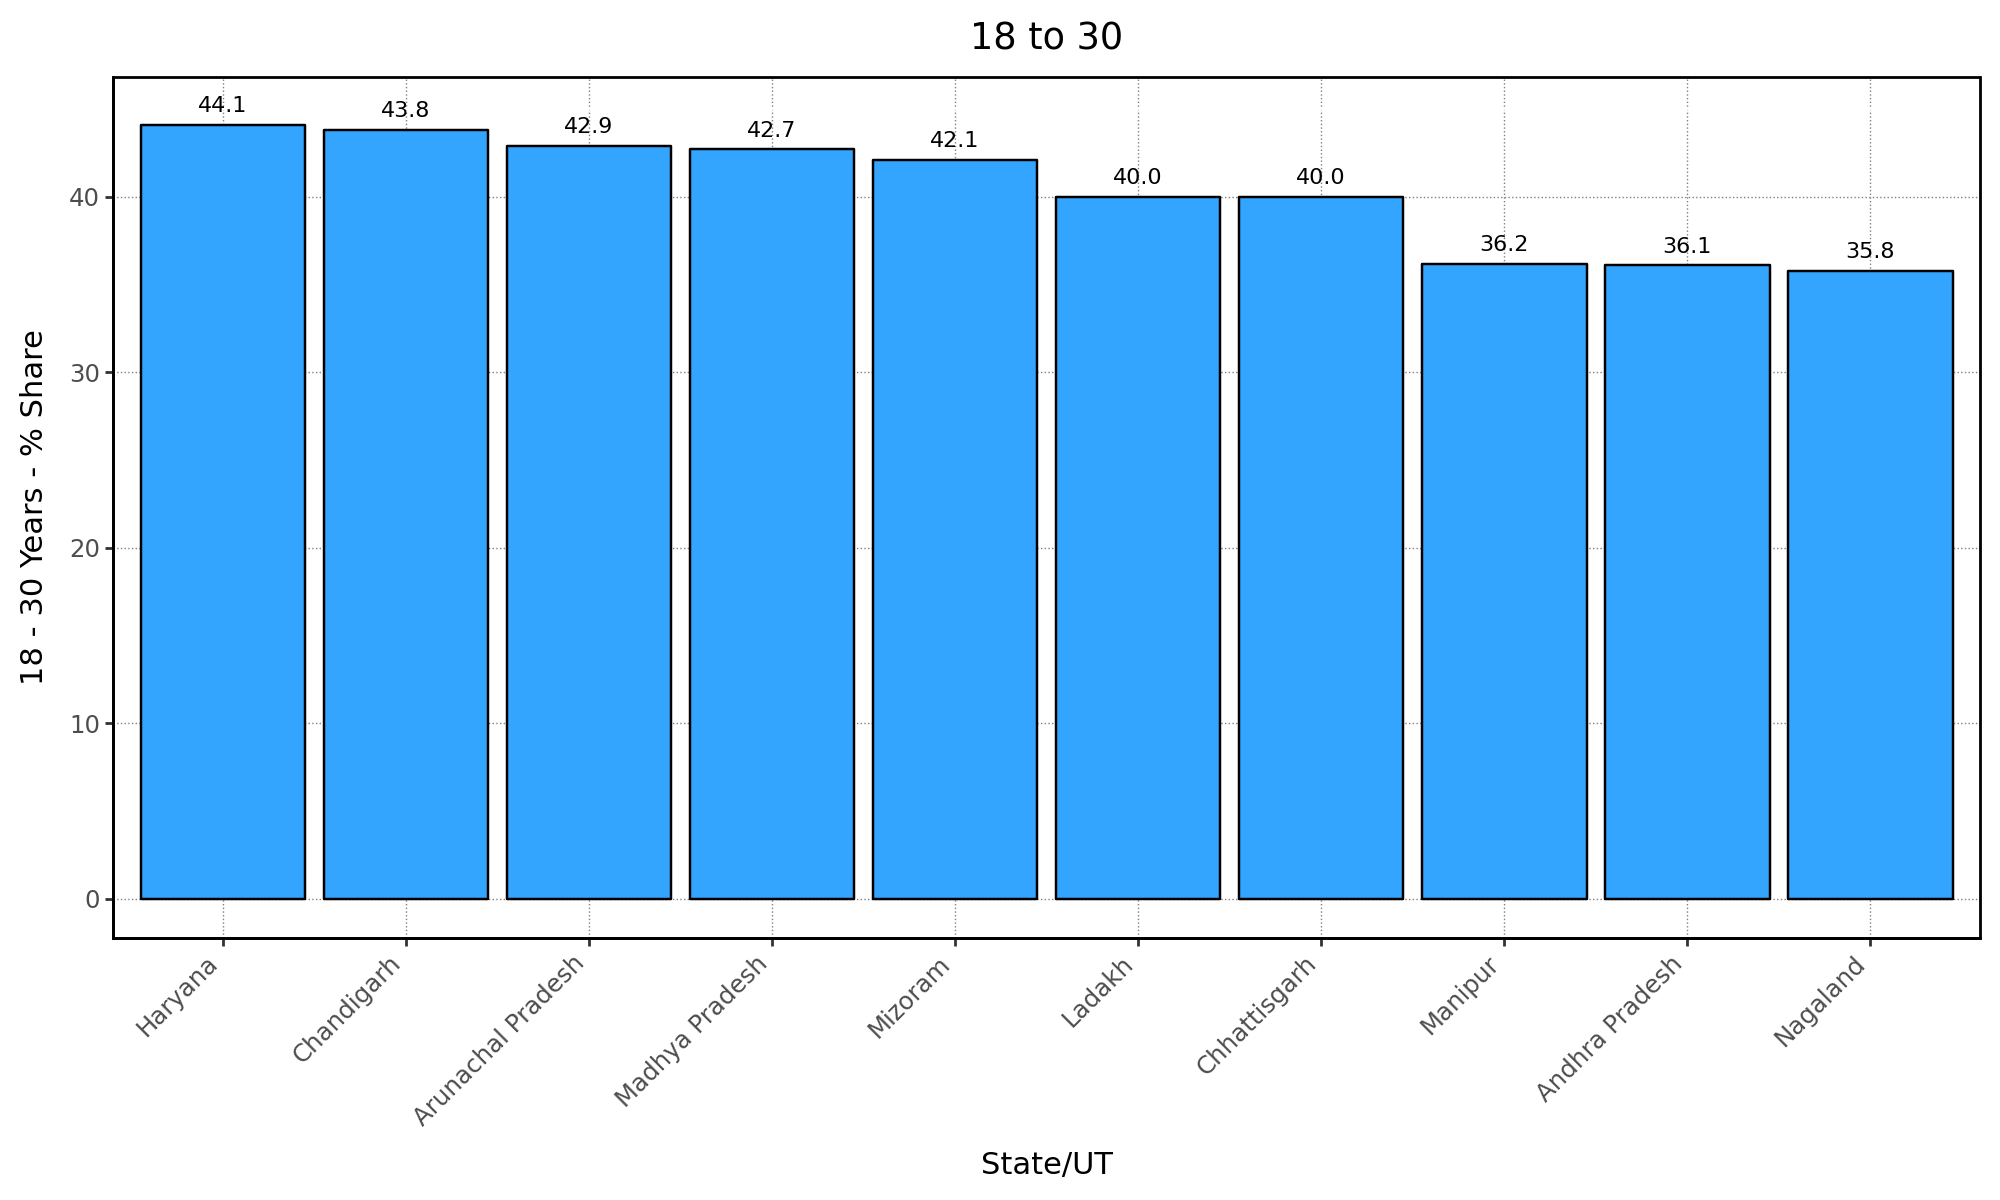

In [337]:
top10_18to30 = age.sort_values(by='18 - 30 Years - % Share', ascending=False).head(10)
top10_sorted = top10_18to30.sort_values(by='18 - 30 Years - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age18to30 = (ggplot(top10_sorted, aes(x='State/UT', y='18 - 30 Years - % Share', label='18 - 30 Years - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  # Change fill color to light blue and add outline
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')  # Add text labels on top of bars
 + labs(x='State/UT', y='18 - 30 Years - % Share', title='18 to 30')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'),  # Change background color if needed
         axis_line=element_line(color='black'),        # Add axis lines
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),  # Add gridlines
         panel_border=element_rect(color='black', fill=None),  # Add border
         figure_size=(10, 6))  # Increase size of the chart
)
bar_age18to30.show()


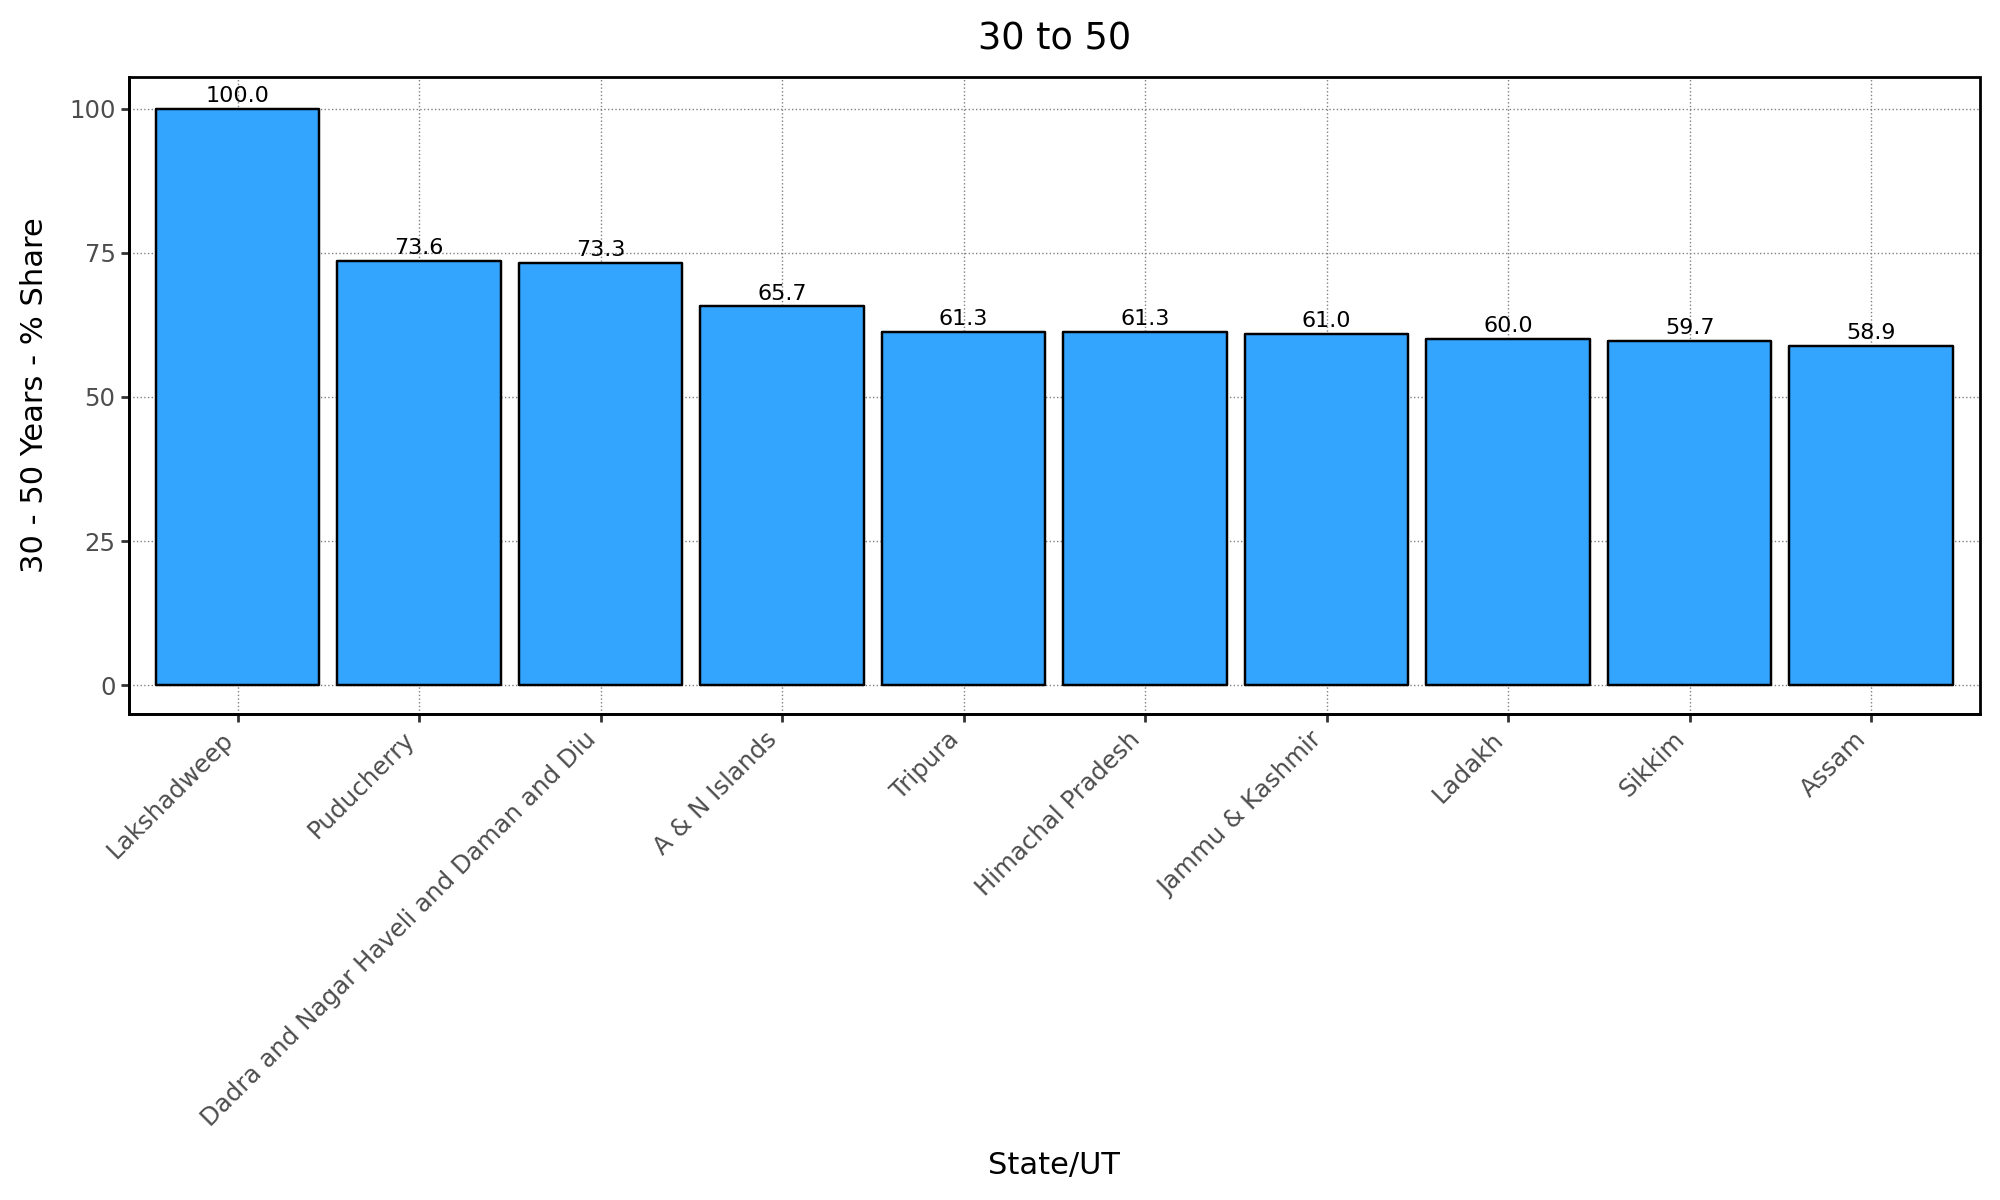

In [338]:
top10_30to50 = age.sort_values(by='30 - 50 Years - % Share', ascending=False).head(10)
top10_sorted = top10_30to50.sort_values(by='30 - 50 Years - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age30to50 = (ggplot(top10_sorted, aes(x='State/UT', y='30 - 50 Years - % Share', label='30 - 50 Years - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  # Change fill color to light blue and add outline
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')  # Add text labels on top of bars
 + labs(x='State/UT', y='30 - 50 Years - % Share', title='30 to 50')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'),  # Change background color if needed
         axis_line=element_line(color='black'),        # Add axis lines
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),  # Add gridlines
         panel_border=element_rect(color='black', fill=None),  # Add border
         figure_size=(10, 6))  # Increase size of the chart
)
bar_age30to50.show()

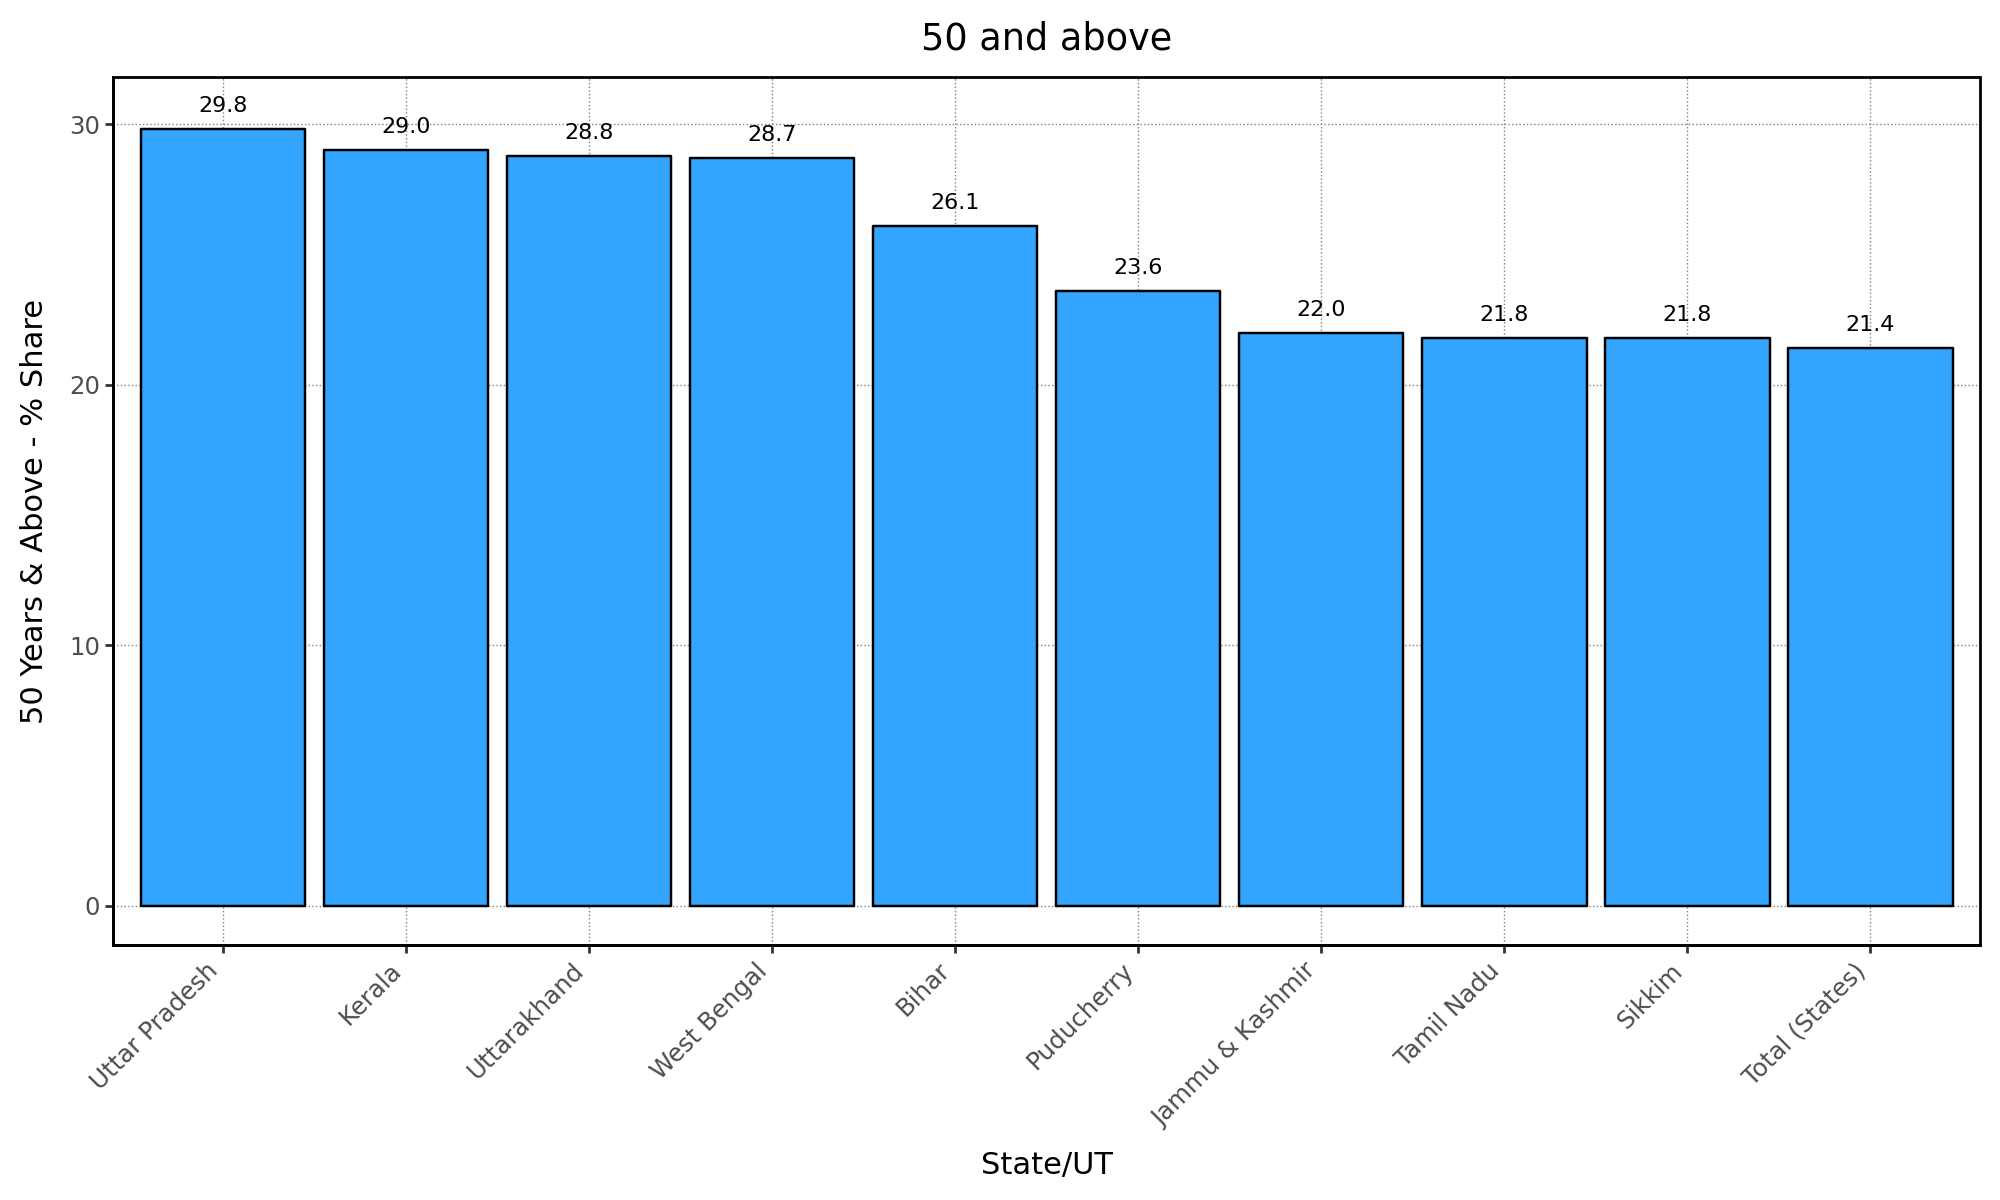

In [339]:
top10_50 =  age.sort_values(by='50 Years & Above - % Share', ascending=False).head(10)
top10_sorted = top10_50.sort_values(by='50 Years & Above - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age18to30 = (ggplot(top10_sorted, aes(x='State/UT', y='50 Years & Above - % Share', label='50 Years & Above - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  # Change fill color to light blue and add outline
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')  # Add text labels on top of bars
 + labs(x='State/UT', y='50 Years & Above - % Share', title='50 and above')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'),  # Change background color if needed
         axis_line=element_line(color='black'),        # Add axis lines
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),  # Add gridlines
         panel_border=element_rect(color='black', fill=None),  # Add border
         figure_size=(10, 6))  # Increase size of the chart
)
bar_age18to30.show()

### Based on Offence

In [347]:
%%capture
columns[49:]

#### We can see from the columns broadly that there are majorly 5-6 kinds of criminal activities like Offence against human body, affecting propertis, riots, specially women, counterfeiting. We'll see a distribution in all India terms among these categories and then facet each of the main 3 categories to show the top 6 crime intensive states 

In [341]:
crime = data.iloc[:,49:]
crime['State/UT'] = states

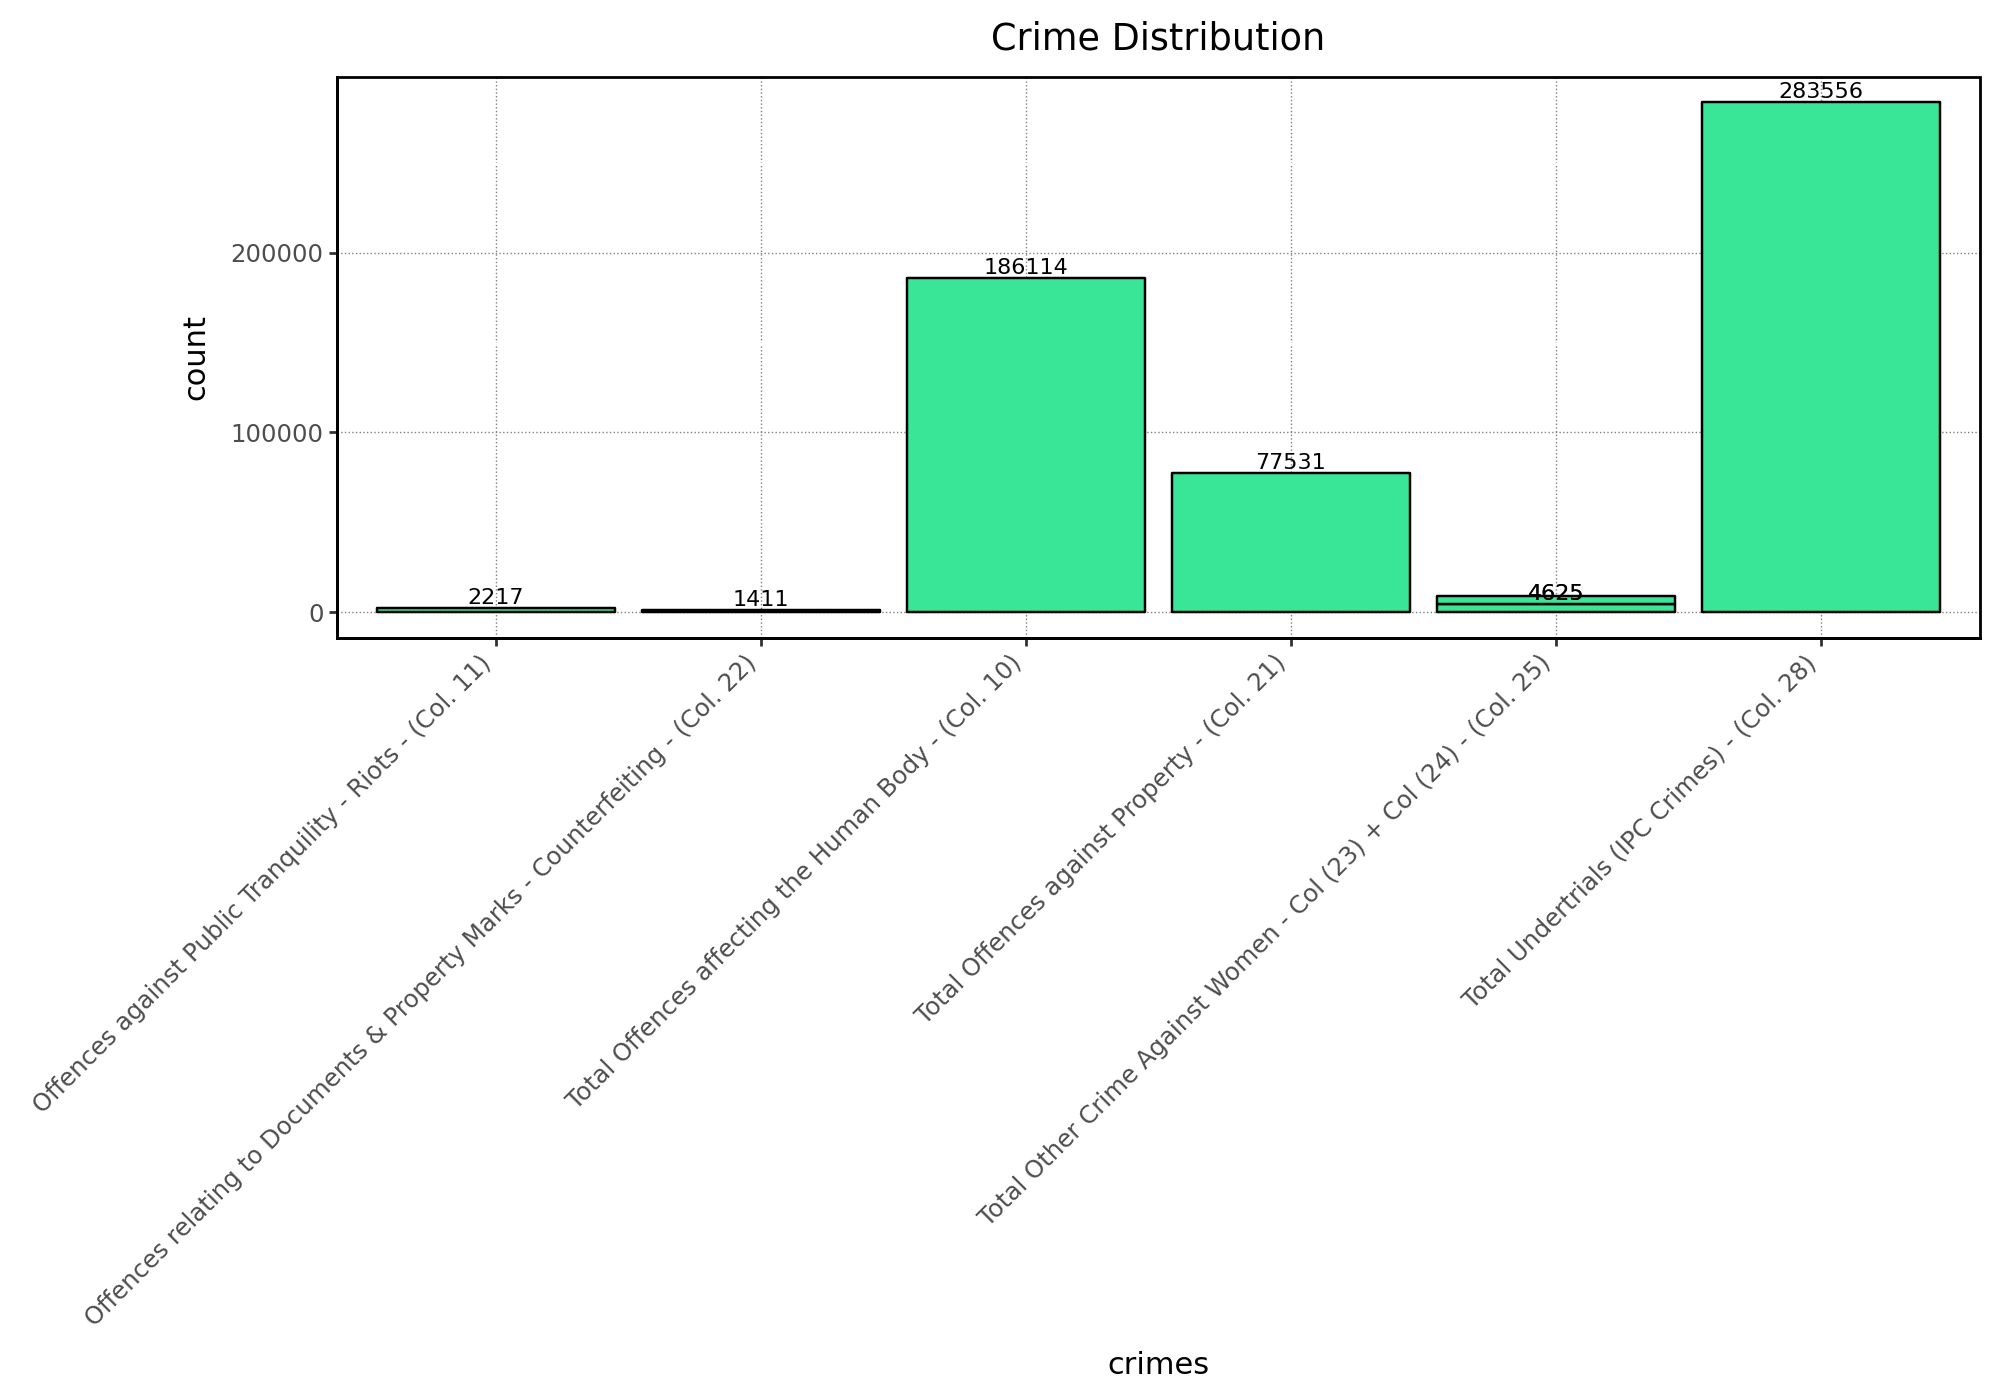

In [345]:
main_crimes = ['Total Offences affecting the Human Body - (Col. 10)','Offences against Public Tranquility - Riots - (Col. 11)','Total Offences against Property - (Col. 21)','Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22)','Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)','Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)','Total Undertrials (IPC Crimes) - (Col. 28)']
temp = pd.DataFrame()
temp['crimes'] = main_crimes
temp['count'] = crimes[main_crimes].iloc[-1].values.tolist()
temp['percentage'] = (temp['count'] / temp['count'].sum()) * 100

all_india = (ggplot(temp, aes(x='crimes', y='count', label='count'))
             + geom_bar(stat='identity', fill='#39E597', color='black')
             + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')
             + labs(x='crimes', y='count', title='Crime Distribution')
             + theme(axis_text_x=element_text(rotation=45, hjust=1),
                     panel_background=element_rect(fill='white'),
                     axis_line=element_line(color='black'),
                     panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),
                     panel_border=element_rect(color='black', fill=None),
                     figure_size=(10, 7))
             )
all_india.show()

### Against Human body

,Offences affecting the Human Body - Murder - (Col. 3),Offences affecting the Human Body - C.H. not amounting to Murder - (Col. 4),Offences affecting the Human Body - Dowry Deaths - (Col. 5),Offences affecting the Human Body - Attempt to Murder - (Col. 6),Offences affecting the Human Body - Kidnapping & Abduction - (Col. 7),Offences affecting the Human Body - Rape - (Col. 8),Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - (Col. 9),Total Offences affecting the Human Body - (Col. 10),Offences against Public Tranquility - Riots - (Col. 11),Offences against Property - Thefts - (Col. 12),...,Offences against Property - Burglary - (Col. 20),Total Offences against Property - (Col. 21),Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22),Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23),Other Crime Against Women - Insult to the Modesty of Women - (Col. 24),Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25),Undertrials of offences against women (Total of Col. 5 + Col. 8 + Col. 9 + Col.23 + Col.24) - (Col. 26),Other IPC Crimes - (Col. 27),Total Undertrials (IPC Crimes) - (Col. 28),State/UT
0,484,53,60,331,50,211,25,1214,0,580,...,97,1044,34,102,8,110,406,345,2747,Andhra Pradesh
1,31,4,0,1,8,9,0,53,0,23,...,10,69,0,0,0,0,9,4,126,Arunachal Pradesh
2,1741,266,66,544,401,318,57,3393,17,1202,...,270,1820,29,159,1,160,601,197,5616,Assam
3,6140,508,1639,4974,1833,1537,315,16946,166,2831,...,290,7532,74,642,27,669,4160,503,25890,Bihar
4,2873,196,123,1383,294,2565,290,7724,37,483,...,373,1753,44,32,14,46,3024,732,10336,Chhattisgarh
5,113,0,0,22,15,37,24,211,0,32,...,0,78,0,0,0,0,61,43,332,Goa
6,3265,75,15,420,502,1651,92,6020,77,613,...,152,1758,84,138,0,138,1896,297,8374,Gujarat
7,4108,189,389,1303,855,1552,251,8647,93,1740,...,253,3756,33,77,16,93,2285,0,12622,Haryana
8,398,3,0,42,32,325,10,810,0,21,...,8,43,0,5,0,5,340,57,915,Himachal Pradesh
9,4085,220,779,1611,801,1793,268,9557,139,1441,...,155,4046,62,410,16,426,3266,134,14364,Jharkhand


In [351]:
state_crime = crimes.iloc[:28,:]
state_crime_human = state_crime.iloc[:,:7]
state_crime_human['State/UT'] = state
state_crime_human

,Offences affecting the Human Body - Murder - (Col. 3),Offences affecting the Human Body - C.H. not amounting to Murder - (Col. 4),Offences affecting the Human Body - Dowry Deaths - (Col. 5),Offences affecting the Human Body - Attempt to Murder - (Col. 6),Offences affecting the Human Body - Kidnapping & Abduction - (Col. 7),Offences affecting the Human Body - Rape - (Col. 8),Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - (Col. 9)
0,484,53,60,331,50,211,25
1,31,4,0,1,8,9,0
2,1741,266,66,544,401,318,57
3,6140,508,1639,4974,1833,1537,315
4,2873,196,123,1383,294,2565,290
5,113,0,0,22,15,37,24
6,3265,75,15,420,502,1651,92
7,4108,189,389,1303,855,1552,251
8,398,3,0,42,32,325,10
9,4085,220,779,1611,801,1793,268


In [ ]:


plot = (
    ggplot(df_melted, aes(x='Offence', y='Count', fill=df_melted.columns[0])) +
    geom_bar(stat='identity') +
    facet_wrap('~ State/UT', scales='free', nrow=3, ncol=2) +  
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=8)) +  
    labs(x='', title='Offences affecting the Human Body by State/UT') +  
    theme(figure_size=(10, 7))  
)
plot.show()